In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("house_prices.csv")
df.shape

(187531, 21)

In [3]:
pd.set_option("display.max_columns",2000)
pd.set_option("display.max_rows",85)

In [4]:
int_features=df.select_dtypes(include=["int64"]).columns
int_features

Index(['Index'], dtype='object')

In [5]:
float_features=df.select_dtypes(include=["float64"]).columns
float_features.tolist()

['Price (in rupees)', 'Dimensions', 'Plot Area']

In [6]:
cat_features=df.select_dtypes(include=["object"]).columns
cat_features.tolist()

['Title',
 'Description',
 'Amount(in rupees)',
 'location',
 'Carpet Area',
 'Status',
 'Floor',
 'Transaction',
 'Furnishing',
 'facing',
 'overlooking',
 'Society',
 'Bathroom',
 'Balcony',
 'Car Parking',
 'Ownership',
 'Super Area']

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,187531.0,93765.000000,54135.681003,0.0,46882.5,93765.0,140647.5,187530.0
Price (in rupees),169866.0,7583.771885,27241.705819,0.0,4297.0,6034.0,9450.0,6700000.0
Dimensions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plot Area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

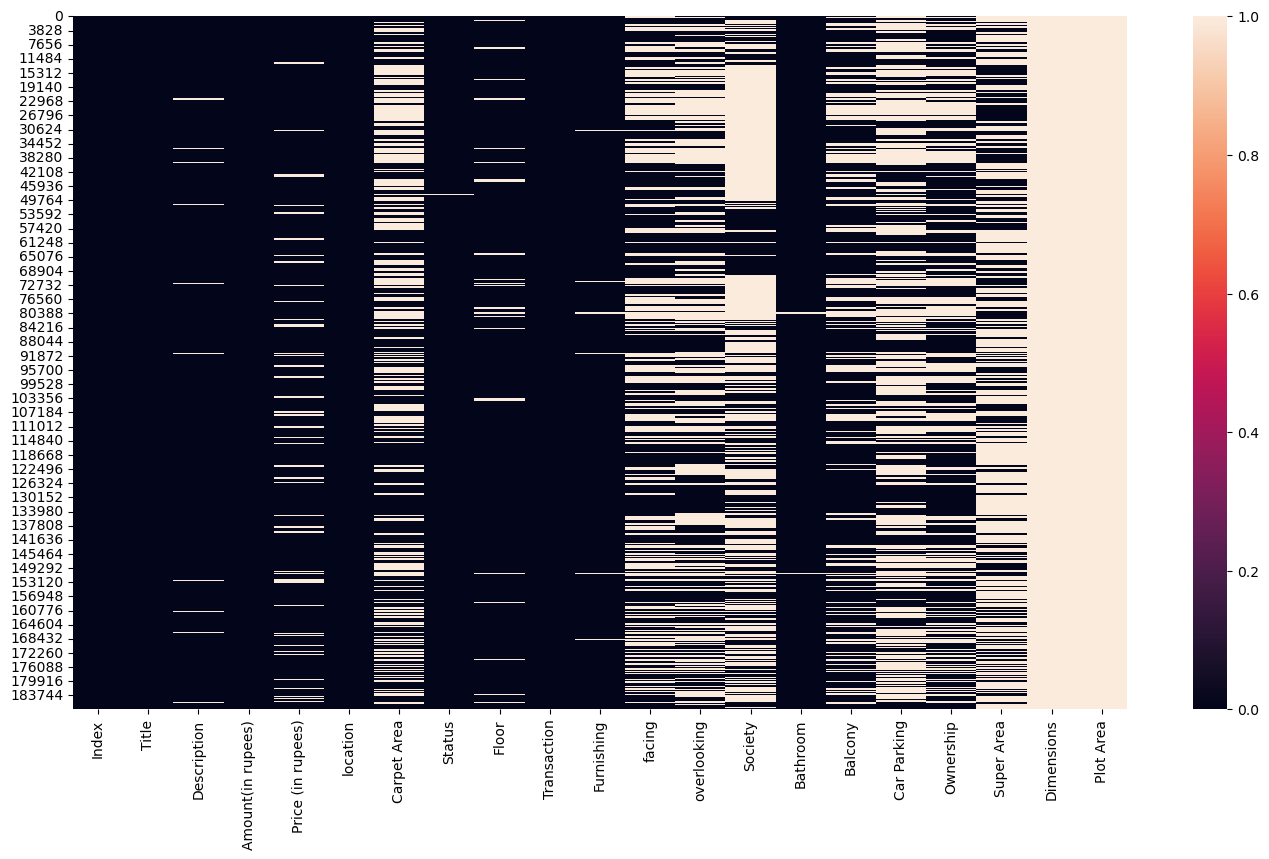

In [9]:
plt.figure(figsize=(17,9))
sns.heatmap(df.isnull())

In [10]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

Index                  0.000000
Title                  0.000000
Description            1.612000
Amount(in rupees)      0.000000
Price (in rupees)      9.419776
location               0.000000
Carpet Area           43.018488
Status                 0.327946
Floor                  3.773776
Transaction            0.044259
Furnishing             1.544811
facing                37.451408
overlooking           43.425354
Society               58.485264
Bathroom               0.441527
Balcony               26.094352
Car Parking           55.114621
Ownership             34.936624
Super Area            57.422506
Dimensions           100.000000
Plot Area            100.000000
dtype: float64

In [11]:
# set index as Index column
df1=df.set_index("Index")

In [12]:
miss_value_50_perc=null_percent[null_percent>50]
miss_value_50_perc
# Remove them as well

Society         58.485264
Car Parking     55.114621
Super Area      57.422506
Dimensions     100.000000
Plot Area      100.000000
dtype: float64

In [13]:
df1 = df1.drop(['Plot Area', 'Car Parking','Dimensions','Balcony','Super Area','Title','Society','Description','Status'],axis='columns')

In [14]:
def convert_rupees(amount_str):
    try:
        parts=amount_str.split()
        amount=float(parts[0])
    
        if len(parts)>1:
            unit=parts[1].strip()
            if unit=='Lac':
                amount*=100000
            elif unit=='Cr':
                amount*=10000000
        return amount
    except(ValueError,IndexError):
        return None

df1['Amount(in rupees)']= df1['Amount(in rupees)'].apply(convert_rupees)

In [15]:
## Handling Carpet Area:
def convert_to_sqft(area):
    try:
        if pd.notnull(area):
            if 'sqft' in area:
                area= float(area.replace(' sqft',''))
            else:
                area=float(area.replace(' sqm',''))*10.7639
            return area
    except ValueError:
        return np.nan
    
df1['Carpet Area']=df1['Carpet Area'].apply(convert_to_sqft)    

In [16]:
# missing value imputation
df1_mvi=df1.copy()
df1_mvi['Floor'].value_counts

<bound method IndexOpsMixin.value_counts of Index
0         10 out of 11
1          3 out of 22
2         10 out of 29
3           1 out of 3
4         20 out of 42
              ...     
187526      2 out of 4
187527      4 out of 6
187528      1 out of 3
187529      2 out of 2
187530     5 out of 13
Name: Floor, Length: 187531, dtype: object>

In [17]:
df1_mvi['Floor'].mode()

0    2 out of 4
Name: Floor, dtype: object

In [18]:
floor_mode = df1_mvi['Floor'].mode()[0]
df1_mvi['Floor'].replace(np.nan, floor_mode, inplace=True)
df1_mvi['Floor'].isnull().sum()

0

In [19]:
# Missing value Imputation with Transaction

df1_mvi['Transaction'].mode()

0    Resale
Name: Transaction, dtype: object

In [20]:
transaction_mode = df1_mvi['Transaction'].mode()[0]
df1_mvi.replace({'Transaction':np.nan}, transaction_mode, inplace=True)
df1_mvi['Transaction'].isnull().sum()

0

In [21]:
df1_mvi['Furnishing'].mode()

0    Semi-Furnished
Name: Furnishing, dtype: object

In [22]:
furnishing_mode=df1_mvi['Furnishing'].mode()[0]
df1_mvi.replace({'Furnishing':np.nan},furnishing_mode,inplace=True)
df1_mvi['Furnishing'].isnull().sum()

0

In [23]:
df1_mvi.Bathroom.unique()

array(['1', '2', '3', '4', '6', nan, '5', '10', '9', '8', '> 10', '7'],
      dtype=object)

In [24]:
df1.head()

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership
Index,,,,,,,,,,,
0,4200000.0,6000.0,thane,500.0,10 out of 11,Resale,Unfurnished,NaN,NaN,1,NaN
1,9800000.0,13799.0,thane,473.0,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,Freehold
2,14000000.0,17500.0,thane,779.0,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,Freehold
3,2500000.0,NaN,thane,530.0,1 out of 3,Resale,Unfurnished,NaN,NaN,1,NaN
4,16000000.0,18824.0,thane,635.0,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,Co-operative Society


In [25]:
def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

In [26]:
df1_mvi[~df1_mvi['Bathroom'].apply(is_float)].head(10)

,Amount(in rupees),Price (in rupees),location,Carpet Area,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership
Index,,,,,,,,,,,
1967,360000000.0,30000.0,mumbai,NaN,28 out of 28,Resale,Unfurnished,East,"Pool, Garden/Park, Main Road",> 10,Freehold
2314,360000000.0,24000.0,mumbai,NaN,40 out of 40,Resale,Unfurnished,East,"Pool, Garden/Park, Main Road",> 10,Freehold
15424,30000000.0,3750.0,bangalore,NaN,Upper Basement out of 5,Resale,Semi-Furnished,NaN,NaN,> 10,NaN
16169,115000000.0,14050.0,bangalore,NaN,1 out of 4,New Property,Furnished,North,Main Road,> 10,Freehold
16200,24000000.0,4000.0,bangalore,NaN,Ground out of 5,Resale,Furnished,South - East,Main Road,> 10,Freehold
16699,65000000.0,3824.0,bangalore,11000.0,4 out of 4,Resale,Semi-Furnished,East,NaN,> 10,Freehold
17538,28000000.0,4308.0,bangalore,NaN,Ground out of 5,Resale,Semi-Furnished,NaN,NaN,> 10,NaN
17562,120000000.0,3333.0,bangalore,NaN,6 out of 6,Resale,Unfurnished,NaN,NaN,> 10,NaN
40412,70000000.0,11667.0,chennai,4220.0,2 out of 3,Resale,Unfurnished,East,NaN,> 10,Freehold


In [27]:
def convert_greaterthan_to_num(area):
    try:
        if pd.notnull(area):
            if '>' in area:
                area=float(area.replace('>',''))
            else:
                area=float(area.replace(' -',''))
            return area
    except ValueError:
        return np.nan

In [28]:
df2=df1_mvi.copy()

In [29]:
df2['Bathroom']=df2['Bathroom'].apply(convert_greaterthan_to_num)

In [30]:
mean_bathroom=df2['Bathroom'].mean()
df2.replace({'Bathroom':np.nan},mean_bathroom,inplace=True)
df2['Bathroom'].isnull().sum()

0

In [31]:
df2.loc[17538]


Amount(in rupees)         28000000.0
Price (in rupees)             4308.0
location                   bangalore
Carpet Area                      NaN
Floor                Ground out of 5
Transaction                   Resale
Furnishing            Semi-Furnished
facing                           NaN
overlooking                      NaN
Bathroom                        10.0
Ownership                        NaN
Name: 17538, dtype: object

In [32]:
amount_mean=df2['Amount(in rupees)'].mean()
df2.replace({'Amount(in rupees)':np.nan},amount_mean,inplace=True)
df2['Amount(in rupees)'].isnull().sum()

0

In [33]:
price_mean = df2['Price (in rupees)'].mean()
df2.replace({'Price (in rupees)':np.nan}, price_mean, inplace=True)
df2['Price (in rupees)'].isnull().sum()

0

In [34]:
carpet_area_mean = df2['Carpet Area'].mean()
df2.replace({'Carpet Area':np.nan}, carpet_area_mean, inplace=True)
df2['Carpet Area'].isnull().sum()

0

In [35]:
df2['Ownership'].value_counts()

Ownership
Freehold                112229
Leasehold                 5285
Co-operative Society      3431
Power Of Attorney         1069
Name: count, dtype: int64

In [36]:
cols_to_fill_unknown = ['facing', 'overlooking', 'Ownership']
df2[cols_to_fill_unknown] = df2[cols_to_fill_unknown].fillna('Unknown')

In [37]:
df3=df2.copy()

In [38]:
df3.rename(columns={'Amount(in rupees)': 'Amount_in_rupees', 'Price (in rupees)': 'Price_in_rupees', 'Carpet Area': 'Carpet_Area_in_sqft'}, inplace=True)

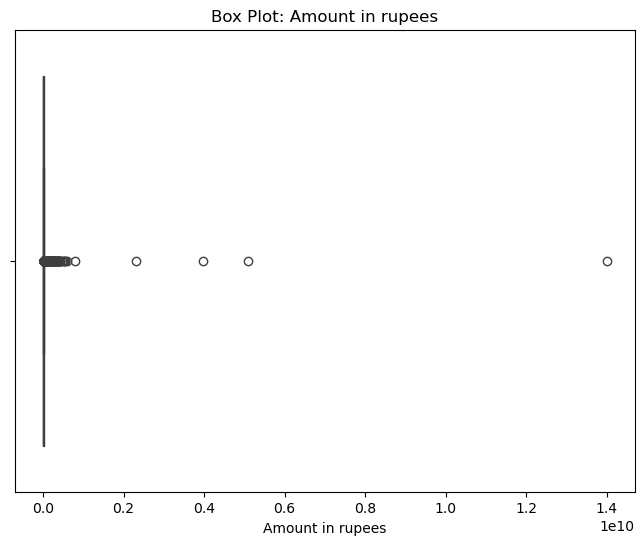

In [39]:
# Box Plot for 'Amount_in_rupees'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount_in_rupees', data=df3)
plt.title("Box Plot: Amount in rupees")
plt.xlabel("Amount in rupees")
plt.show()

Summary statistics for column Amount_in_rupees
count    1.875310e+05
mean     1.198134e+07
std      3.840648e+07
min      1.000000e+05
25%      5.000000e+06
50%      8.200000e+06
75%      1.360000e+07
max      1.400300e+10
Name: Amount_in_rupees, dtype: float64


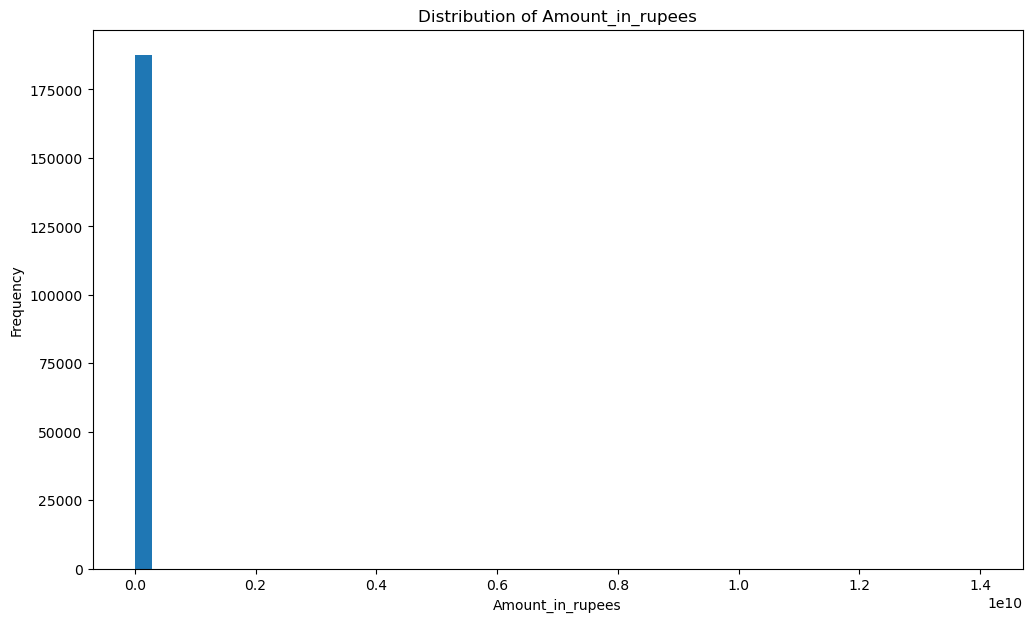

Summary statistics for column Price_in_rupees
count    1.875310e+05
mean     7.583772e+03
std      2.592692e+04
min      0.000000e+00
25%      4.501500e+03
50%      6.499000e+03
75%      8.452500e+03
max      6.700000e+06
Name: Price_in_rupees, dtype: float64


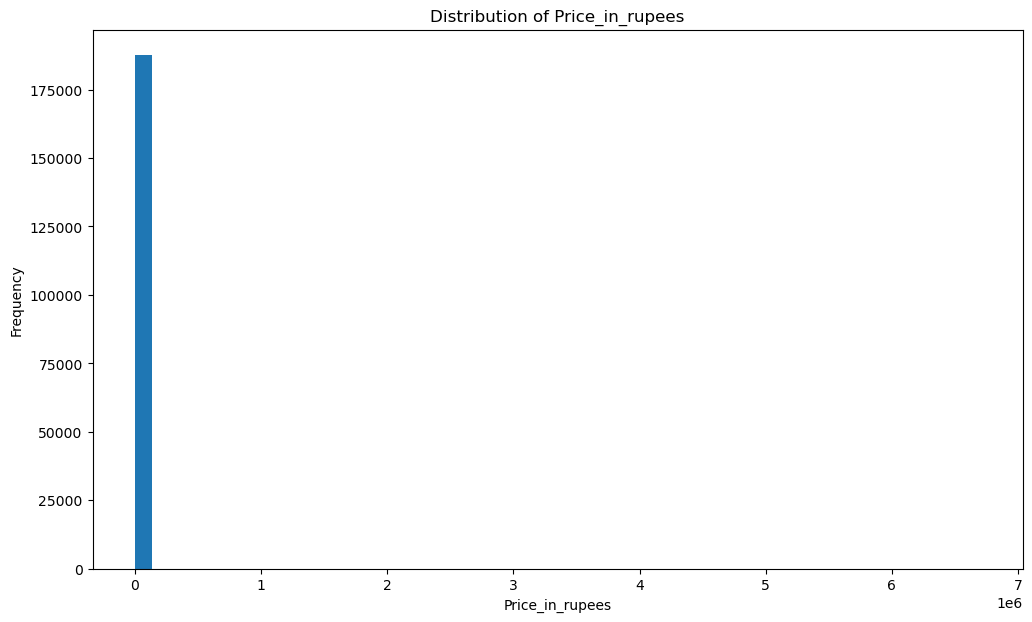

Summary statistics for column Carpet_Area_in_sqft
count    187531.000000
mean       1267.967442
std        2301.537433
min           1.000000
25%        1000.000000
50%        1267.967442
75%        1267.967442
max      709222.000000
Name: Carpet_Area_in_sqft, dtype: float64


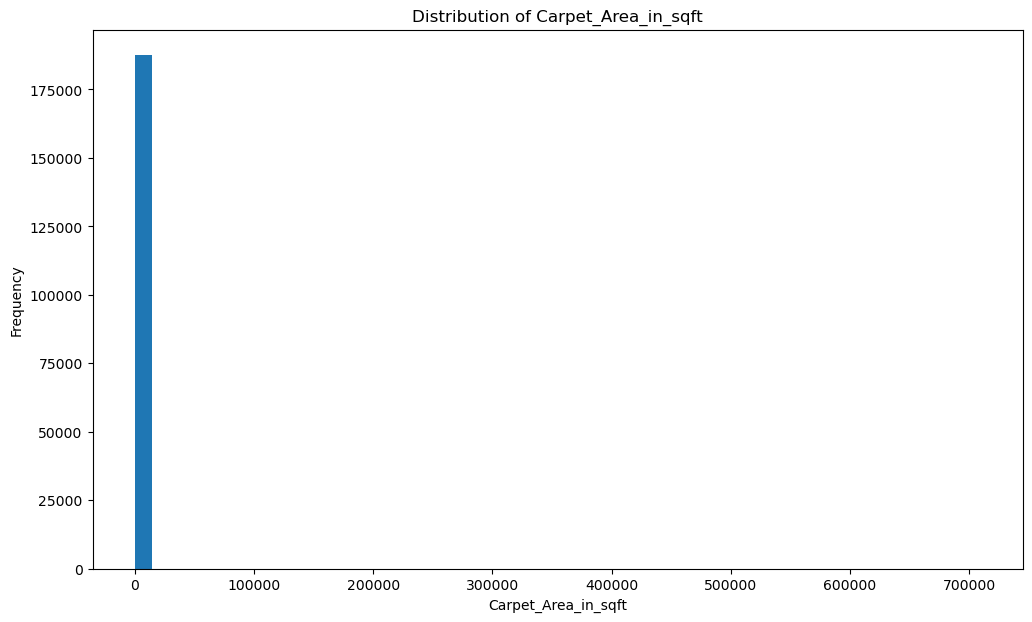

Summary statistics for column Bathroom
count    187531.000000
mean          2.428060
std           0.867447
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          10.000000
Name: Bathroom, dtype: float64


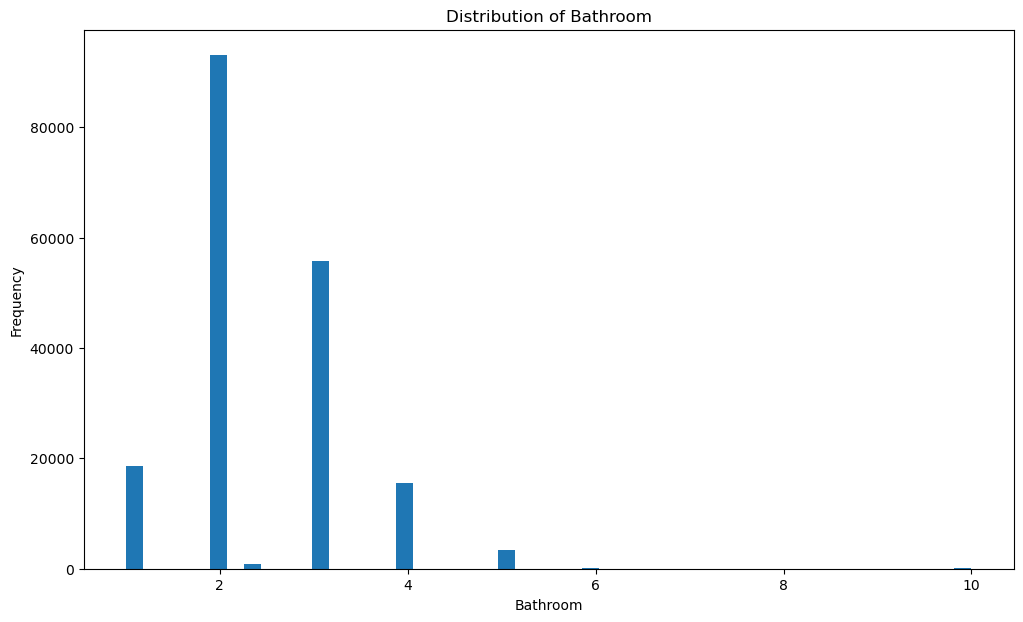

In [40]:
numeric_columns = ['Amount_in_rupees', 'Price_in_rupees', 'Carpet_Area_in_sqft', 'Bathroom',]
for columns in numeric_columns:
    print("Summary statistics for column", columns)
    print(df3[columns].describe())
    plt.figure(figsize=(12, 7))
    plt.hist(df3[columns], bins=50)
    plt.title(f"Distribution of {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

Unique values in column Transaction
Transaction
Resale          144255
New Property     42565
Other              709
Rent/Lease           2
Name: count, dtype: int64


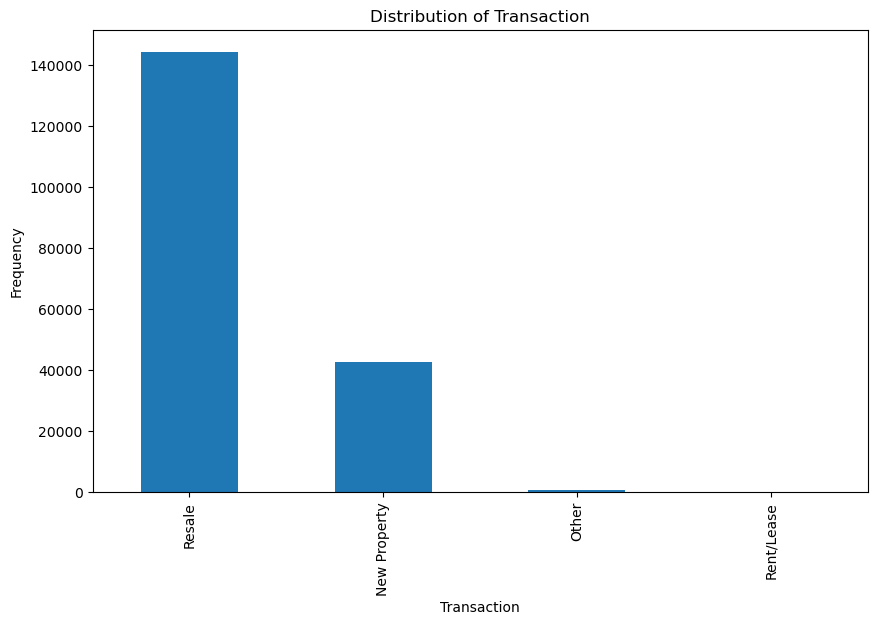

Unique values in column Furnishing
Furnishing
Semi-Furnished    91215
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64


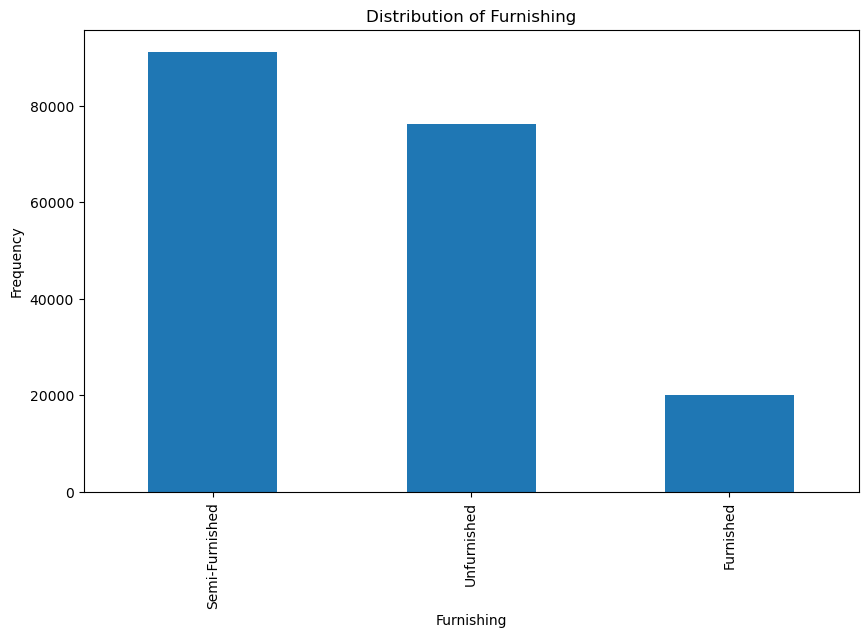

Unique values in column facing
facing
Unknown         70233
East            54741
North - East    24220
North           16533
West             8574
South            4694
North - West     3843
South - East     2622
South -West      2071
Name: count, dtype: int64


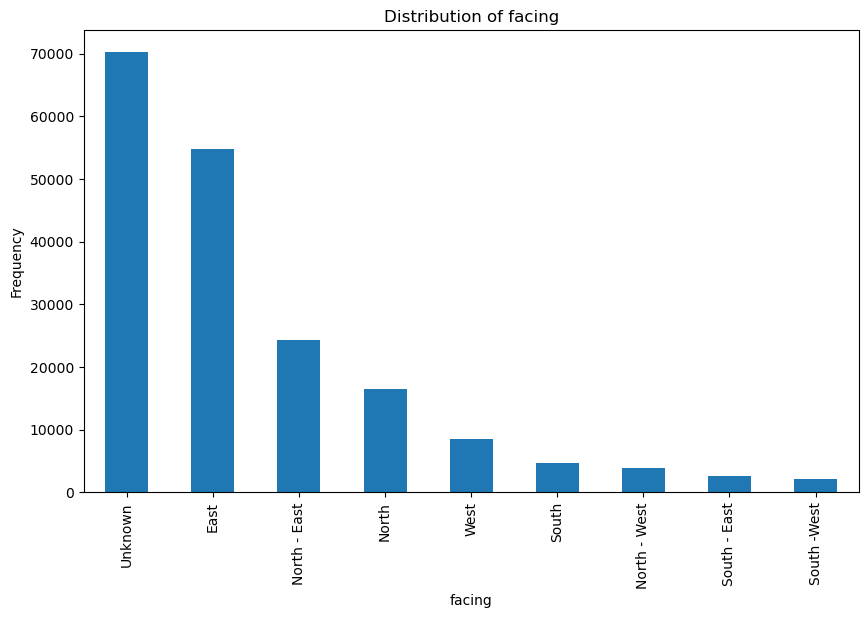

Unique values in column overlooking
overlooking
Unknown                                        81436
Main Road                                      32193
Garden/Park, Main Road                         27238
Garden/Park                                    23077
Garden/Park, Pool, Main Road                   12413
Pool, Garden/Park, Main Road                    3615
Garden/Park, Pool                               2880
Main Road, Garden/Park, Pool                    1359
Pool, Main Road                                 1136
Pool                                            1012
Main Road, Garden/Park                           666
Pool, Garden/Park                                435
Garden/Park, Main Road, Pool                      39
Main Road, Pool                                   11
Main Road, Pool, Garden/Park                       8
Pool, Main Road, Garden/Park                       6
Main Road, Not Available                           4
Garden/Park, Pool, Main Road, Not Available        

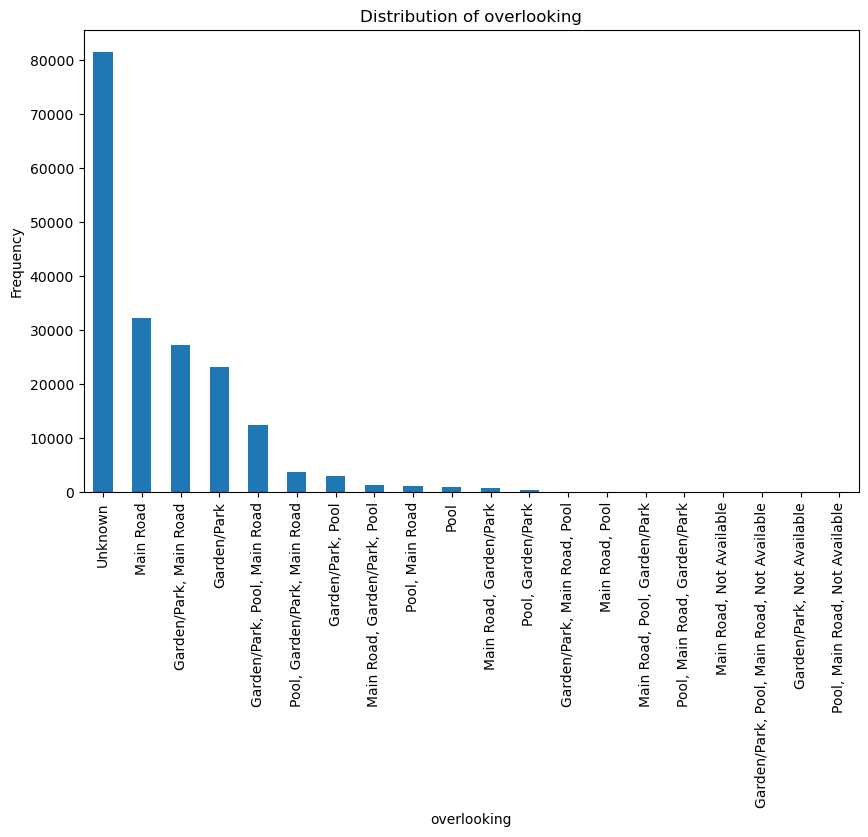

Unique values in column Ownership
Ownership
Freehold                112229
Unknown                  65517
Leasehold                 5285
Co-operative Society      3431
Power Of Attorney         1069
Name: count, dtype: int64


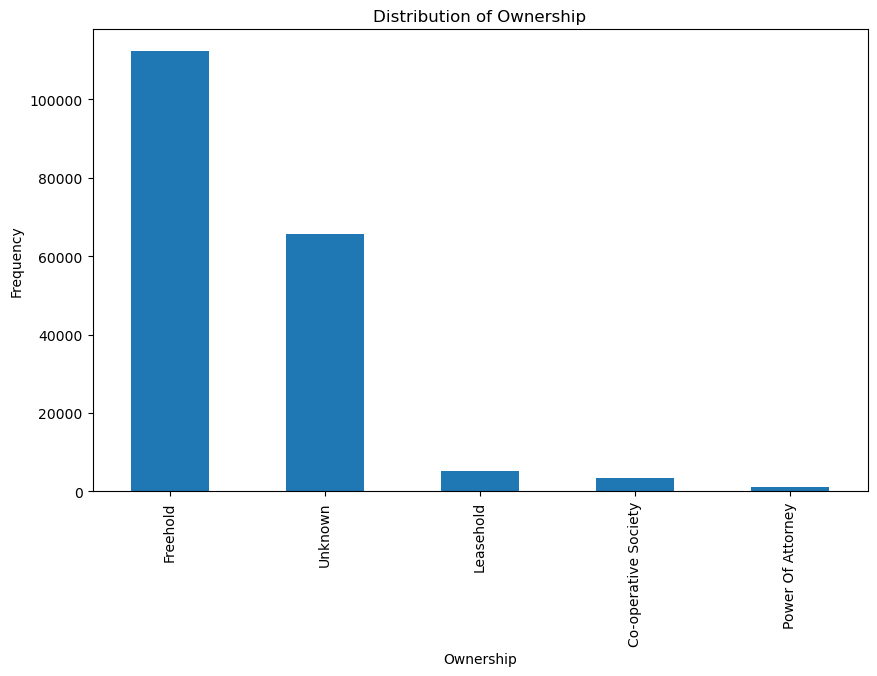

In [41]:
categorical_columns = ['Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership']
for columns in categorical_columns:
    print("Unique values in column", columns)
    print(df3[columns].value_counts())
    plt.figure(figsize=(10, 6))
    df3[columns].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

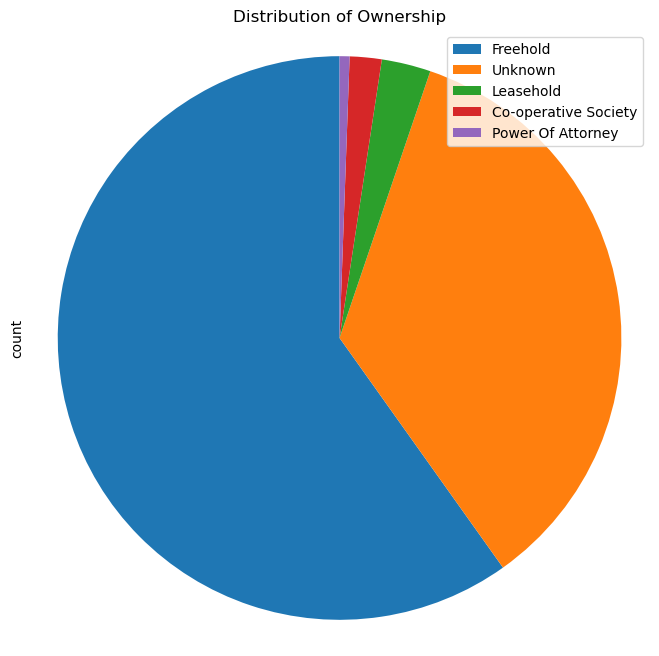

In [42]:
 #Let's plot a pie chart for the 'Ownership' column
plt.figure(figsize=(8, 8))
df3['Ownership'].value_counts().plot(kind='pie', labels=None, startangle=90)
plt.axis('equal')
plt.legend(labels=df3['Ownership'].value_counts().index, loc='best')
plt.title("Distribution of Ownership")
plt.show()

In [43]:
df4 = df3.copy()

In [44]:
dummies = pd.get_dummies(df4.location,dummy_na=False,dtype=int)
dummies.head(3)


,agra,ahmadnagar,ahmedabad,allahabad,aurangabad,badlapur,bangalore,belgaum,bhiwadi,bhiwandi,bhopal,bhubaneswar,chandigarh,chennai,coimbatore,dehradun,durgapur,ernakulam,faridabad,ghaziabad,goa,greater-noida,guntur,gurgaon,guwahati,gwalior,haridwar,hyderabad,indore,jabalpur,jaipur,jamshedpur,jodhpur,kalyan,kanpur,kochi,kolkata,kozhikode,lucknow,ludhiana,madurai,mangalore,mohali,mumbai,mysore,nagpur,nashik,navi-mumbai,navsari,nellore,new-delhi,noida,palakkad,palghar,panchkula,patna,pondicherry,pune,raipur,rajahmundry,ranchi,satara,shimla,siliguri,solapur,sonipat,surat,thane,thrissur,tirupati,trichy,trivandrum,udaipur,udupi,vadodara,vapi,varanasi,vijayawada,visakhapatnam,vrindavan,zirakpur
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df5 = pd.concat([df4,dummies],axis='columns'  )
df5.tail()

,Amount_in_rupees,Price_in_rupees,location,Carpet_Area_in_sqft,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership,agra,ahmadnagar,ahmedabad,allahabad,aurangabad,badlapur,bangalore,belgaum,bhiwadi,bhiwandi,bhopal,bhubaneswar,chandigarh,chennai,coimbatore,dehradun,durgapur,ernakulam,faridabad,ghaziabad,goa,greater-noida,guntur,gurgaon,guwahati,gwalior,haridwar,hyderabad,indore,jabalpur,jaipur,jamshedpur,jodhpur,kalyan,kanpur,kochi,kolkata,kozhikode,lucknow,ludhiana,madurai,mangalore,mohali,mumbai,mysore,nagpur,nashik,navi-mumbai,navsari,nellore,new-delhi,noida,palakkad,palghar,panchkula,patna,pondicherry,pune,raipur,rajahmundry,ranchi,satara,shimla,siliguri,solapur,sonipat,surat,thane,thrissur,tirupati,trichy,trivandrum,udaipur,udupi,vadodara,vapi,varanasi,vijayawada,visakhapatnam,vrindavan,zirakpur
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
187526,6300000.0,3225.0,zirakpur,1267.967442,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,3.0,Freehold,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
187527,5500000.0,3274.0,zirakpur,1267.967442,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3.0,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
187528,7600000.0,4343.0,zirakpur,1250.000000,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",3.0,Freehold,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
187529,3000000.0,4231.0,zirakpur,1267.967442,2 out of 2,Resale,Semi-Furnished,Unknown,Main Road,2.0,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
187530,11800000.0,6162.0,zirakpur,1267.967442,5 out of 13,Resale,Semi-Furnished,North - East,"Garden/Park, Pool",4.0,Freehold,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
df5.shape

(187531, 92)

In [47]:
df6=df5.drop('location',axis='columns')
df6.head()

,Amount_in_rupees,Price_in_rupees,Carpet_Area_in_sqft,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Ownership,agra,ahmadnagar,ahmedabad,allahabad,aurangabad,badlapur,bangalore,belgaum,bhiwadi,bhiwandi,bhopal,bhubaneswar,chandigarh,chennai,coimbatore,dehradun,durgapur,ernakulam,faridabad,ghaziabad,goa,greater-noida,guntur,gurgaon,guwahati,gwalior,haridwar,hyderabad,indore,jabalpur,jaipur,jamshedpur,jodhpur,kalyan,kanpur,kochi,kolkata,kozhikode,lucknow,ludhiana,madurai,mangalore,mohali,mumbai,mysore,nagpur,nashik,navi-mumbai,navsari,nellore,new-delhi,noida,palakkad,palghar,panchkula,patna,pondicherry,pune,raipur,rajahmundry,ranchi,satara,shimla,siliguri,solapur,sonipat,surat,thane,thrissur,tirupati,trichy,trivandrum,udaipur,udupi,vadodara,vapi,varanasi,vijayawada,visakhapatnam,vrindavan,zirakpur
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4200000.0,6000.000000,500.0,10 out of 11,Resale,Unfurnished,Unknown,Unknown,1.0,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9800000.0,13799.000000,473.0,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2.0,Freehold,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14000000.0,17500.000000,779.0,10 out of 29,Resale,Unfurnished,East,Garden/Park,2.0,Freehold,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2500000.0,7583.771885,530.0,1 out of 3,Resale,Unfurnished,Unknown,Unknown,1.0,Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16000000.0,18824.000000,635.0,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2.0,Co-operative Society,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import LabelEncoder
# Function to perform Label Encoding for multiple columns
def label_encode_multiple(df6, columns):
    le = LabelEncoder()
    for column in columns:
        df6[column] = le.fit_transform(df6[column])
    return df6

label_encode_columns = ['Transaction','Floor', 'Furnishing', 'facing', 'overlooking', 'Ownership']
df8 = label_encode_multiple(df6, label_encode_columns)

In [49]:
from sklearn.preprocessing import StandardScaler
# Standardization
fc = StandardScaler()
df8_standardized = fc.fit_transform(df8)
df = pd.DataFrame(df8_standardized, columns=df8.columns)

In [50]:
X = df.drop(columns=['Amount_in_rupees'])
y = df['Amount_in_rupees']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [101]:
model = DecisionTreeRegressor(
    max_depth=11,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
scoree = model.score(X_test,y_test)

print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Accuracy of Model:{scoree:.2f}')
print('****************************************')

R-squared: 0.88
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (RMSE): 0.25
Accuracy of Model:0.88
****************************************
